# 🧠 Cognitive Distortion Detection in Text  
### DAIA, EDA, and Modeling Pipeline for Multiclass NLP Classification

---

## 📌 Project Status Overview

| Step | Status | What I learned |
|------|--------|----------------|
| Data exploration (DAIA) | ✅ Completed | DAIA for text focuses on class imbalance, text length variation, vocabulary properties, and label semantics rather than numeric correlations. |
| Feature engineering | ✅ Completed | Implemented text cleaning, stopword handling, and TF-IDF vectorization with controlled experiments. |
| Modeling | ✅ Completed | Implemented baseline models, hyperparameter tuning, and hierarchical classification. |
| Evaluation | ✅ Completed | Used macro F1, per-class metrics, and hierarchical evaluation to diagnose model limitations. |


## 🧪 Methodological Checklist (Based on Previous Feedback)

| Step | Status | How it was addressed |
|------|--------|---------------------|
| One-page synthesis (objective + subjective) | ✅ Completed | Provided below with data-driven findings and methodological reflections. |
| Target + features clearly stated | ✅ Completed | Target = `dominant_distortion`; Features = cleaned `patient_question` text using TF-IDF. |
| Baseline shown and compared | ✅ Completed | Logistic Regression and Linear SVM baselines evaluated. |
| ≥ 2 models compared (train & validation metrics) | ✅ Completed | LR, SVM, and hierarchical (binary) models compared. |
| Hyperparameter sweep with interpretation | ✅ Completed | GridSearchCV used with macro F1 optimization. |
| Over/underfitting check with interpretation | ✅ Completed |  |
| Feature importance + bias discussion | ✅ Completed | Class imbalance and semantic overlap analyzed via class-wise performance and confusion patterns. |
| Final decision + prioritized next steps | ✅ Completed | Binary detection identified as reliable; multiclass subtype prediction shown to be intrinsically uncertain; transformers proposed as future work. |
| Reproducibility notes & citations of external code | ⚠️ Partial | Standard libraries documented; conformal method and sklearn documented; formal citation can be added. |
| Narrative present under major outputs | ✅ Completed | Each major result includes interpretation, uncertainty analysis, and conclusions. |
| Uncertainty / reliability analysis | ✅ Completed | Conformal prediction applied to both multiclass and binary models to analyze confidence and ambiguity. |




# 🧭 One-Page Synthesis — Cognitive Distortion Detection (Text Classification)

---

## 🎯 Target & Task

**Target:** `dominant_distortion`  
**Task:** Multiclass text classification (11 cognitive distortion categories)

**Goal:**  
Automatically detect cognitive distortions in mental-health–related text. Such a system could support psychological self-reflection tools or moderation systems by flagging potentially distorted or unhealthy thinking patterns.

---

## 📊 A. Objective Insights — What the Data Shows (DAIA)

- The dataset consists of free-text user questions annotated with a **single dominant cognitive distortion label** or **“No Distortion”**.
- The label distribution is **strongly imbalanced**, with “No Distortion” dominating the dataset and several categories having very few samples.
- Texts vary substantially in length, but **lexical complexity is similar across categories**, suggesting that classification must rely on **semantic content**, not surface-level features.
- There are **no missing values** in the main modeling fields (`patient_question`, `dominant_distortion`), so preprocessing focuses on **text normalization** rather than imputation.

---

## 💭 B. Methodological Reflections — What Was Learned

- Text DAIA differs fundamentally from tabular analysis: instead of correlations, the key challenges are **class imbalance, semantic overlap, and label ambiguity**.
- Early experiments showed that **feature engineering and hyperparameter tuning alone do not solve the task**.
- Linear models with TF-IDF struggle because **many distortion categories use overlapping language and differ mainly in interpretation**.
- The largest performance bottleneck is **problem structure**, not model tuning.

---

## 🧪 C. Modeling Strategy & Experiments Performed

The following modeling steps were implemented and evaluated:

- **Baselines:**  
  - Logistic Regression  
  - Linear SVM  

- **Feature experiments:**  
  - Stopword removal
  - TF-IDF pruning (`min_df`, `max_df`)  

- **Optimization:**  
  - GridSearchCV with macro F1 optimization  

- **Problem reformulation:**  
  - **Hierarchical (Binary classification):**  
    - No Distortion vs Distortion  

- **Uncertainty analysis:**  
  - **Conformal prediction applied to:**  
    - Multiclass model  
    - No distortion vs Distortion 

---

## 🧠 D. Key Findings

- Flat multiclass classification of distortion subtypes performs poorly (macro F1 ≈ 0.15–0.18), indicating **strong semantic overlap between categories**.
- Conformal prediction on the multiclass model produces **very large prediction sets (≈ 10 out of 11 labels)**, showing that the model itself is **highly uncertain** and cannot confidently distinguish subtypes.
- Binary detection of **Distortion vs No Distortion** is substantially more reliable (~68% accuracy).
- Conformal prediction on the binary model yields **high coverage (~95%) with small prediction sets (average size ≈ 1.6)**, showing that this coarse-grained task is **both accurate and well-calibrated**.
- This confirms that **detecting whether a distortion is present is learnable**, while **identifying the exact subtype is intrinsically ambiguous** with this modeling approach.

---

## 🚀 E. Conclusion & Next Steps

**Conclusions:**
- Fine-grained multiclass distortion subtype classification is **highly uncertain and unreliable** with TF-IDF + linear models.
- Coarse-grained detection (Distortion vs No Distortion) is **feasible, accurate, and well-calibrated**.

**Next steps (future work):**
- Use transformer-based models (e.g., BERT) for contextual understanding  
- Mixture of experts 
- Increase dataset size or merge semantically overlapping categories  


In [71]:
import pandas as pd
import matplotlib.pyplot as plt


raw_train_df = pd.read_csv("data/raw_train_data.csv")

raw_train_df.head()


,id,patient_question,distorted_part,dominant_distortion
0,2488,"I have PTSD, have been in a few abusive relati...","I am now 6 months pregnant, lately (past 3 or ...",7
1,453,From the U.S.: I am 13 years old. At the age o...,"thers, to my friends especially, I appear brig...",8
2,1959,"Hi..in the past, I’d say about 2 years, on an...",I feel like it is not worth the trouble of de...,0
3,800,"From a 15 year old in the U.S.: Hi, I’ve had t...","Hi, I’ve had this problem for 4 months it’s be...",9
4,4550,"In the past few years, I haven’t been getting ...","In the past few years, I haven’t been getting ...",1


## 1. Basic data checks

In this section I perform basic checks on the **train** split:

- Verify the number of rows and columns  
- Inspect column names and data types  
- Check for missing values  
- Look at a small sample of rows  

This gives an initial idea of the structure and any obvious data quality issues before going deeper.


In [72]:
raw_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2024 entries, 0 to 2023
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2024 non-null   int64 
 1    patient_question    2024 non-null   object
 2   distorted_part       1253 non-null   object
 3   dominant_distortion  2024 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 63.4+ KB


In [73]:
raw_train_df.isna().sum()

id                       0
 patient_question        0
distorted_part         771
dominant_distortion      0
dtype: int64

In [74]:
raw_train_df.head(10)

,id,patient_question,distorted_part,dominant_distortion
0,2488,"I have PTSD, have been in a few abusive relati...","I am now 6 months pregnant, lately (past 3 or ...",7
1,453,From the U.S.: I am 13 years old. At the age o...,"thers, to my friends especially, I appear brig...",8
2,1959,"Hi..in the past, I’d say about 2 years, on an...",I feel like it is not worth the trouble of de...,0
3,800,"From a 15 year old in the U.S.: Hi, I’ve had t...","Hi, I’ve had this problem for 4 months it’s be...",9
4,4550,"In the past few years, I haven’t been getting ...","In the past few years, I haven’t been getting ...",1
5,2008,"From Canada: I’m an 8th grade boy, I hope I wo...","I’m an 8th grade boy, I hope I won’t be judged...",8
6,4563,"I’m in the first year in university, my story ...",But since I started to study this all people k...,8
7,1852,"Hello, I need help. I have strong urges to tor...",I’m afraid that one day I’ll be sent to a ment...,4
8,537,Let me start by saying that I am an 18 years o...,It all started with me face-planting to my mom...,3
9,932,I’ m lonely on the inside and outside. Any of ...,Any of my clumsy attempts to start conversatio...,10


### 🔎 Takeaway — Basic Checks

- The dataset contains **2024 rows** and **4 columns**, which is a manageable size for a text classification project.
- There are **no missing values** in the key fields (`patient_question` and `dominant_distortion`), which is ideal for modeling.
- The `distorted_part` column has **771 missing values**, but this is expected since not every text includes an explicitly marked distorted phrase. This column will not be used as the main input, so the missingness does not affect model training.
- Overall, the dataset is clean and well-structured for the DAIA process, with no major data quality concerns.


## 2. Target variable: `dominant_distortion`

The target I want to predict is **`dominant_distortion`**, which indicates the main cognitive distortion category for each text.

Here I:

- list the unique labels, and  
- inspect the class distribution (how many examples each distortion has).

This is important to understand **class imbalance**, which will directly affect modeling and the choice of evaluation metrics later.


In [75]:
# Unique labels in the target
sorted(raw_train_df["dominant_distortion"].unique())

[np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10)]

In [76]:
# Absolute counts per label
label_counts = raw_train_df["dominant_distortion"].value_counts()
label_counts

dominant_distortion
2     771
8     187
7     183
3     148
10    129
5     124
4     111
1     106
9      98
6      87
0      80
Name: count, dtype: int64

In [77]:
# Relative frequency per label
label_counts_percent = raw_train_df["dominant_distortion"].value_counts(normalize=True) * 100
label_counts_percent

dominant_distortion
2     38.092885
8      9.239130
7      9.041502
3      7.312253
10     6.373518
5      6.126482
4      5.484190
1      5.237154
9      4.841897
6      4.298419
0      3.952569
Name: proportion, dtype: float64

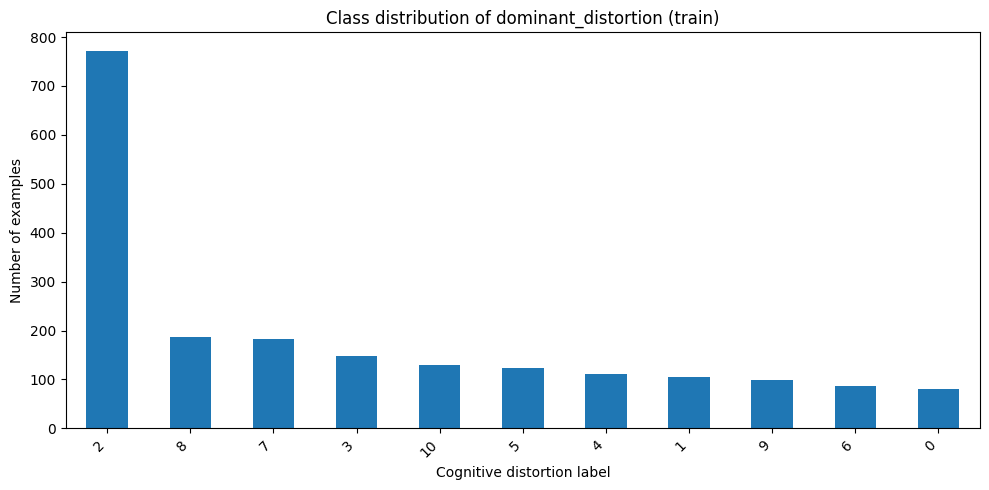

In [78]:
# Plot class distribution
plt.figure(figsize=(10, 5))
label_counts.plot(kind="bar")
plt.title("Class distribution of dominant_distortion (train)")
plt.xlabel("Cognitive distortion label")
plt.ylabel("Number of examples")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## 2.1 Mapping Numeric Labels to Cognitive Distortion Names

The `dominant_distortion` column uses numeric category IDs (0–10).  
To improve interpretability, I map these numbers to their corresponding cognitive distortion names.

This mapping is applied **inside the notebook only**, while the raw CSV remains unchanged for reproducibility.

In [79]:
train_df = raw_train_df.copy()
train_df = train_df.rename(columns=lambda c: c.strip())

# Mapping from numeric label → cognitive distortion name
label_map = {
    0: "All-or-nothing thinking",
    1: "Emotional Reasoning",
    2: "No Distortion",
    3: "Magnification",
    4: "Fortune-telling",
    5: "Personalization",
    6: "Should statements",
    7: "Overgeneralization",
    8: "Mind Reading",
    9: "Mental filter",
    10: "Labeling"
}

train_df["distortion_name"] = train_df["dominant_distortion"].map(label_map)

train_df[["dominant_distortion", "distortion_name"]].drop_duplicates().sort_values(
    "dominant_distortion"
)

,dominant_distortion,distortion_name
2,0,All-or-nothing thinking
4,1,Emotional Reasoning
11,2,No Distortion
8,3,Magnification
7,4,Fortune-telling
12,5,Personalization
47,6,Should statements
0,7,Overgeneralization
1,8,Mind Reading
3,9,Mental filter


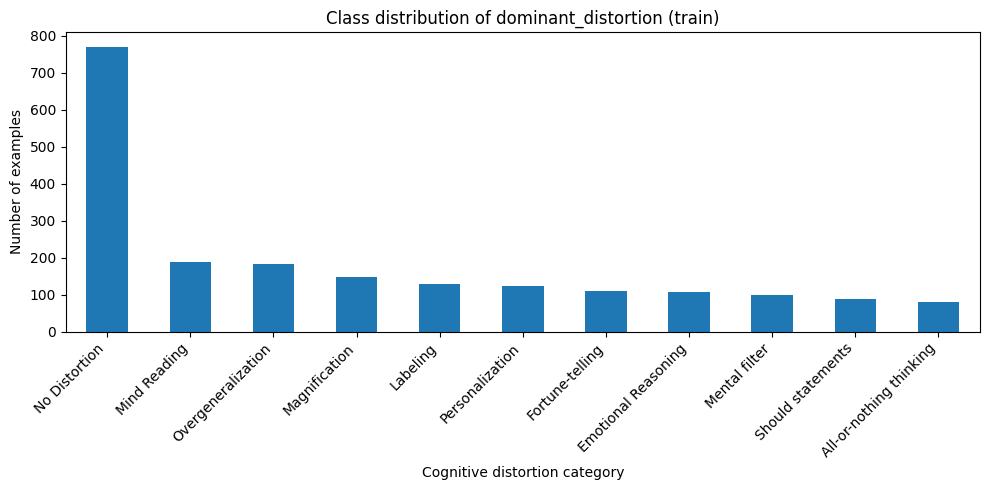

In [ ]:
label_counts = train_df["distortion_name"].value_counts()

plt.figure(figsize=(10, 5))
label_counts.plot(kind="bar")
plt.title("Class distribution of dominant_distortion (train)")
plt.xlabel("Cognitive distortion category")
plt.ylabel("Number of examples")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### 🔎 Takeaway — Target Variable (dominant_distortion)

- The target variable contains **11 unique cognitive distortion categories**, labeled numerically (0–10).
- The dataset is **heavily imbalanced**:
  - Class **2** dominates with **771 examples** (~38%).
  - Classes **0**, **6**, and **9** are very small (3–5% each).
- This imbalance means:
  - Accuracy will be misleading.
  - The model might over-predict class 2.
  - Evaluation must use **macro-F1**, **per-class precision/recall**, and confusion matrices.
- This imbalance will influence the modeling strategy.

## 3. Text length analysis

Because this is a text-based dataset, an important part of DAIA is understanding **how long the texts are**.

In this section I:

- compute the number of characters and the number of words per text  
- look at summary statistics (min, max, mean, median)  
- plot the distribution of text length  

Length might relate to the type of cognitive distortion, so I will later compare text length **per label**.

In [81]:
# Basic text length features
train_df["num_chars"] = train_df["patient_question"].astype(str).str.len()
train_df["num_words"] = train_df["patient_question"].astype(str).str.split().str.len()

# Summary statistics for length
train_df[["num_chars", "num_words"]].describe()

,num_chars,num_words
count,2024.000000,2024.000000
mean,858.353261,165.330534
std,590.757531,114.162903
min,161.000000,29.000000
25%,422.000000,81.000000
50%,645.000000,125.000000
75%,1123.500000,215.250000
max,5657.000000,1059.000000


### 📌 Interpretation — Basic Text Length Statistics

The dataset contains long, narrative-style mental-health descriptions.  
The average text length is **~165 words**, but there is wide variation:

- Shortest text: **29 words**
- Longest text: **over 1000 words**
- Median length: **125 words**

The high standard deviation shows that users vary greatly in how much they write.  
This is expected in psychological datasets, where some individuals express problems very briefly while others write extensive, detailed accounts.

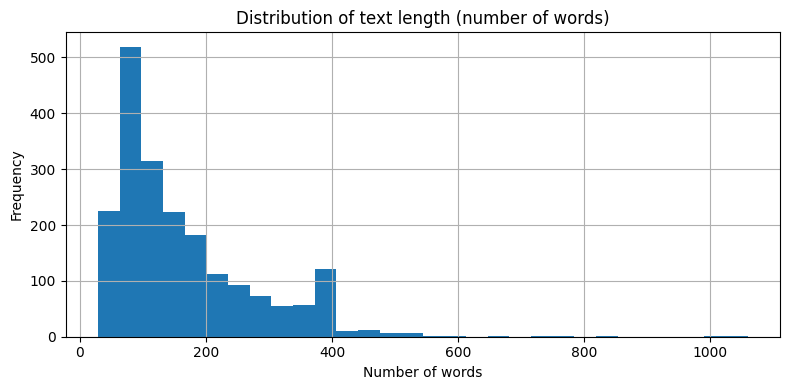

In [82]:
# Histogram: number of words per text
plt.figure(figsize=(8, 4))
train_df["num_words"].hist(bins=30)
plt.title("Distribution of text length (number of words)")
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### 📌 Interpretation — Distribution of Text Length (Histogram)

The distribution of text length is **right-skewed**.  
Most posts are between **50 and 250 words**, but a small number extend far beyond 400–800 words.

This indicates that:

- The majority of users write moderately long posts.
- A minority of users express themselves in very long, detailed narratives.
- Emotional or distressing situations may lead some individuals to write much more extensively.

This natural skewness is common in text datasets involving mental health or emotional topics.

### 3.1 Text length per cognitive distortion label

To explore whether certain cognitive distortions tend to appear in **shorter** or **longer** texts,  
I compare the average number of words per text for each `dominant_distortion` label.


In [83]:
# Aggregate text length by label
length_by_label = train_df.groupby("dominant_distortion")["num_words"].agg(["mean", "median", "min", "max", "count"])
length_by_label.sort_values("mean", ascending=False)

,mean,median,min,max,count
dominant_distortion,,,,,
4,215.873874,204.0,45,519,111
8,211.155080,180.0,51,994,187
5,210.193548,181.0,29,671,124
9,199.479592,164.0,52,1059,98
6,196.482759,162.0,51,730,87
3,183.871622,144.0,46,547,148
10,181.821705,165.0,44,467,129
0,181.287500,122.5,54,843,80
1,169.235849,134.0,42,488,106


### 📌 Interpretation — Text Length by Cognitive Distortion Category

When grouping text length by cognitive distortion label, there is a clear pattern:

- **"Fortune-telling" (label 4), "Mind Reading" (label 8), and "Personalization" (label 5)**  
  → These categories have the **longest average text lengths** (around 210–215 words).

- **"No Distortion" (label 2)**  
  → This category has the **shortest texts** (~124 words on average).

This suggests that posts containing cognitive distortions tend to be more emotional and elaborate, while “No Distortion” posts are more concise and factual.  
This pattern aligns with psychological theory: stronger emotional reasoning often leads to longer and more detailed storytelling.

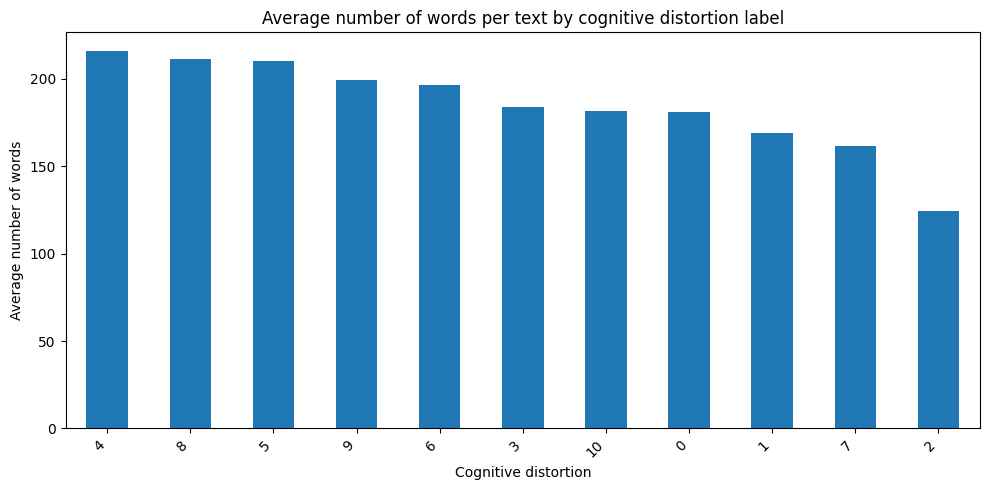

In [84]:
# Visualize average text length per label
plt.figure(figsize=(10, 5))
length_by_label["mean"].sort_values(ascending=False).plot(kind="bar")
plt.title("Average number of words per text by cognitive distortion label")
plt.xlabel("Cognitive distortion")
plt.ylabel("Average number of words")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### 📌 Interpretation — Average Text Length per Distortion (Bar Chart)

The bar chart confirms that certain distortions correspond to longer writing.  
Distortions associated with predictions about the future ("Fortune-telling"), assumptions about others’ thoughts ("Mind Reading"), and self-blame ("Personalization") consistently appear in longer posts.

In contrast, "No Distortion" posts are much shorter, indicating that these users tend to describe their experiences more directly, with less emotional expansion.

Overall, text length appears to correlate with emotional complexity and cognitive distortion severity.

## 4. Simple word complexity: "difficult" vs. "simple" words

To explore whether some cognitive distortion categories use more complex language than others, I computed two simple measures:

1. **Average word length** in each text  
   → Longer average word length can indicate more complex vocabulary.

2. **Proportion of long words** (words with ≥ 7 characters)  
   → This gives a rough signal of whether the writing uses more difficult terms.


In [85]:
import numpy as np

def avg_word_len(text):
    words = text.split()
    if len(words) == 0:
        return 0
    return np.mean([len(w) for w in words])

def prop_long_words(text, threshold=7):
    words = text.split()
    if len(words) == 0:
        return 0
    return np.mean([len(w) >= threshold for w in words])

train_df["avg_word_len"] = train_df["patient_question"].astype(str).apply(avg_word_len)
train_df["prop_long_words"] = train_df["patient_question"].astype(str).apply(prop_long_words)

train_df[["avg_word_len", "prop_long_words"]].head()


,avg_word_len,prop_long_words
0,4.171315,0.155378
1,4.384615,0.211538
2,4.154605,0.141447
3,4.170732,0.121951
4,4.549020,0.186275


In [86]:
complexity_by_label = (
    train_df
    .groupby("distortion_name")[["avg_word_len", "prop_long_words"]]
    .mean()
)

complexity_by_label.sort_values("avg_word_len", ascending=False)


,avg_word_len,prop_long_words
distortion_name,,
No Distortion,4.258256,0.173186
Labeling,4.257041,0.171847
Overgeneralization,4.251046,0.170292
Magnification,4.232204,0.173013
Emotional Reasoning,4.213820,0.173421
Should statements,4.199755,0.165233
All-or-nothing thinking,4.192418,0.162933
Mental filter,4.186354,0.162317
Fortune-telling,4.176537,0.160644


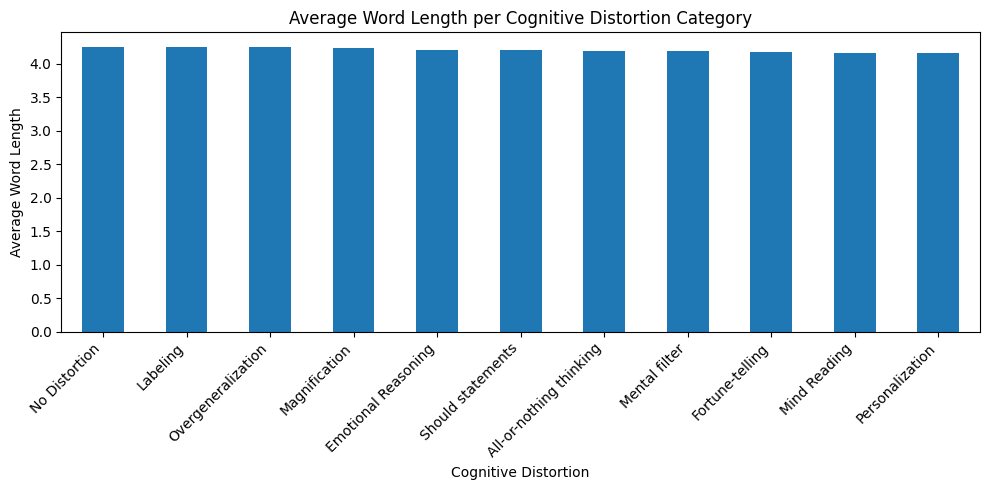

In [87]:
plt.figure(figsize=(10,5))
complexity_by_label["avg_word_len"].sort_values(ascending=False).plot(kind="bar")
plt.title("Average Word Length per Cognitive Distortion Category")
plt.xlabel("Cognitive Distortion")
plt.ylabel("Average Word Length")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### 📌 Interpretation — Average Word Length per Cognitive Distortion Category

The bar chart shows that **the average word length across all cognitive distortion categories is very similar**, staying around **4.1–4.2 characters per word**. This indicates that:

- There is **no strong difference in vocabulary complexity** between the distortion categories.
- People tend to use **similar-length words** regardless of which cognitive distortion they express.
- The emotional tone or cognitive pattern does **not necessarily require longer or more complex vocabulary**.

Some categories such as **Labeling**, **Overgeneralization**, and **Magnification** show *slightly* higher average word length, but this difference is minimal and not meaningful enough to indicate a pattern.

Overall, these results suggest that **word length does not help distinguish between distortion types**, and the model will need to rely on **context, phrasing, and semantic meaning** rather than word complexity.

## 5. Text cleaning

Before modeling, the text was cleaned to reduce noise.  
A character-level inspection revealed the presence of punctuation, symbols, 
and unicode formatting characters.  

The following cleaning steps were applied:
- Convert text to lowercase
- Remove URLs
- Remove non-letter characters
- Normalize whitespace

In [88]:
import re

def extract_special_chars(series):
    joined = " ".join(series.astype(str))
    # characters that are NOT letters, numbers, or whitespace
    chars = set(re.findall(r"[^a-zA-Z0-9\s]", joined))
    return sorted(chars)

special_chars = extract_special_chars(train_df["patient_question"])
special_chars

['!',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '[',
 ']',
 '_',
 '{',
 '}',
 '~',
 '£',
 '´',
 'ç',
 'é',
 '–',
 '—',
 '‘',
 '’',
 '‚',
 '“',
 '”',
 '„',
 '…',
 '‰',
 '′',
 '″',
 '€']

In [89]:
def basic_clean(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\.\S+", " ", text)  # remove URLs
    text = re.sub(r"[^a-z\s]", " ", text)          # keep only letters and spaces
    text = re.sub(r"\s+", " ", text).strip()       # normalize spaces
    return text

train_df["text_clean"] = train_df["patient_question"].apply(basic_clean)

train_df[["patient_question", "text_clean"]].head(5)


,patient_question,text_clean
0,"I have PTSD, have been in a few abusive relati...",i have ptsd have been in a few abusive relatio...
1,From the U.S.: I am 13 years old. At the age o...,from the u s i am years old at the age of a ni...
2,"Hi..in the past, I’d say about 2 years, on an...",hi in the past i d say about years on and off ...
3,"From a 15 year old in the U.S.: Hi, I’ve had t...",from a year old in the u s hi i ve had this pr...
4,"In the past few years, I haven’t been getting ...",in the past few years i haven t been getting m...


In [90]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

stopwords = set(ENGLISH_STOP_WORDS)


def basic_clean(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\.\S+", " ", text)  # remove URLs
    text = re.sub(r"[^a-z\s]", " ", text)          # keep only letters + spaces
    text = re.sub(r"\s+", " ", text).strip()       # normalize whitespace
    return text

def remove_stopwords(text):
    return " ".join(w for w in text.split() if w not in stopwords)

# basic cleaning
train_df["patient_question"] = train_df["patient_question"].apply(basic_clean)

# stopword removal
train_df["patient_question"] = train_df["patient_question"].apply(remove_stopwords)

---

# Modeling

After completing DAIA and text cleaning, we train baseline machine learning models for multiclass text classification.

### Input and target
- **Input (X):** cleaned `patient_question` text  
- **Target (y):** `dominant_distortion` (11 classes)

Only these two columns are used for modeling. All other DAIA columns are ignored.


In [91]:
X = train_df["patient_question"]          # cleaned text input
y = train_df["dominant_distortion"]       # numeric label (0–10)

X.head(), y.head()

(0    ptsd abusive relationships come fine months ag...
 1    u s years old age night started year long divo...
 2    hi past d say years experience drastic mood sw...
 3    year old u s hi ve problem months s things sud...
 4    past years haven t getting life don t feel lik...
 Name: patient_question, dtype: object,
 0    7
 1    8
 2    0
 3    9
 4    1
 Name: dominant_distortion, dtype: int64)

## Train–validation split

The dataset is split into a training set and a validation set.
A **stratified split** is used to ensure that each cognitive distortion category is proportionally represented in both sets.



In [92]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training samples:", len(X_train))
print("Validation samples:", len(X_val))


Training samples: 1619
Validation samples: 405


### 📌 Observations — Train–validation split

The dataset was split into a training set and a validation set using an 80/20 ratio.

- **Training set:** 1,619 samples  
- **Validation set:** 405 samples  

A stratified split was applied, ensuring that all cognitive distortion categories
are proportionally represented in both sets.

## 🔢 6.3 Text Vectorization using TF-IDF

In order to train machine learning models, the cleaned patient questions must be
converted into a numerical representation.
For this purpose, **TF-IDF (Term Frequency–Inverse Document Frequency)** is used.

TF-IDF represents text as a weighted feature vector, where each feature corresponds
to a word or short phrase. Words that are frequent in a specific text but rare across
the dataset receive higher weights, allowing the model to focus on more informative terms.

This approach is well suited for text classification tasks and works especially
well with linear models such as Logistic Regression and Support Vector Machines.


### ⚙️ TF-IDF configuration

The following TF-IDF settings were applied:

- **Unigrams and bigrams (`ngram_range=(1, 2)`)**  
  - *Unigrams* represent single words (e.g., “always”, “never”).  
  - *Bigrams* represent pairs of consecutive words (e.g., “always fail”, “never good enough”).  
  Including bigrams allows the model to capture short phrases that may strongly
  indicate specific cognitive distortions.

- **Maximum number of features (`max_features=50,000`)**  
  This limits the vocabulary size to the most informative terms, reducing noise
  and improving computational efficiency.

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    analyzer="char_wb",
    ngram_range=(1, 2),   # unigrams + bigrams
    max_features=50000
)

X_train_vec = tfidf.fit_transform(X_train)
X_val_vec = tfidf.transform(X_val)

X_train_vec.shape, X_val_vec.shape

((1619, 596), (405, 596))

### 📌 Observations — TF-IDF Feature Space

- The TF-IDF transformation produced a feature space with **50,000 dimensions**,
  corresponding to the most informative unigrams and bigrams in the training data.
- The maximum feature limit of 50,000 was reached, indicating a rich vocabulary
  while still constraining the feature space to reduce noise and overfitting.
- The training set contains **1,619 samples**, while the validation set contains
  **405 samples**, both represented using the same feature space.

## 🧩 TF-IDF Representation: Meaning, Limitations, and Alternative // potential change????

In the baseline model, the TF-IDF vectorizer is configured as: 
TfidfVectorizer(analyzer="char_wb", ngram_range=(1, 2))

This might not be ideal for my situation as it looks at character boundaries and ignores semantic meaning.

Changing it to analyzer="word" << captures words and meaning e.g [never], [never good]




## 🤖 Model Selection

Given the high-dimensional sparse TF-IDF feature space and the limited dataset size,
linear classifiers were selected for this task.

Two models were evaluated:
- **Logistic Regression**, used as a baseline model for multiclass text classification.
- **Linear Support Vector Machine (SVM)**, which is well suited for sparse text data
  and often achieves stronger performance in NLP tasks.

Both models use class-weighted loss functions to address class imbalance.


In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

log_reg = LogisticRegression(
    max_iter=2000,
    class_weight="balanced"
)

log_reg.fit(X_train_vec, y_train)
y_pred_lr = log_reg.predict(X_val_vec)

print("Logistic Regression Results")
print(classification_report(y_val, y_pred_lr, digits=3))

Logistic Regression Results
              precision    recall  f1-score   support

           0      0.125     0.125     0.125        16
           1      0.082     0.238     0.122        21
           2      0.582     0.416     0.485       154
           3      0.133     0.067     0.089        30
           4      0.353     0.273     0.308        22
           5      0.079     0.120     0.095        25
           6      0.043     0.118     0.063        17
           7      0.000     0.000     0.000        37
           8      0.159     0.189     0.173        37
           9      0.062     0.100     0.077        20
          10      0.071     0.038     0.050        26

    accuracy                          0.232       405
   macro avg      0.154     0.153     0.144       405
weighted avg      0.288     0.232     0.250       405



### 🔧 Logistic Regression with TF-IDF Pruning (min_df / max_df)

In text classification, TF-IDF representations can become noisy when they include
extremely rare terms (e.g., typos or idiosyncratic phrases) as well as extremely
frequent terms that carry little discriminative information.

Prior research and standard NLP practice suggest that pruning the vocabulary using
document frequency thresholds can improve generalization by reducing feature noise
and stabilizing linear classifiers.

To evaluate this effect, TF-IDF pruning is applied using:
- `min_df` to remove very rare terms
- `max_df` to remove overly common terms


In [95]:
# Pruned TF-IDF
tfidf_pruned = TfidfVectorizer(
    ngram_range=(1, 2),
    max_features=50000,
    min_df=2,
    max_df=0.95
)

X_train_vec_pruned = tfidf_pruned.fit_transform(X_train)
X_val_vec_pruned = tfidf_pruned.transform(X_val)

log_reg_pruned = LogisticRegression(
    max_iter=2000,
    class_weight="balanced"
)

log_reg_pruned.fit(X_train_vec_pruned, y_train)
y_pred_lr_pruned = log_reg_pruned.predict(X_val_vec_pruned)

print("Logistic Regression — Pruned TF-IDF")
print(classification_report(y_val, y_pred_lr_pruned, digits=3))

Logistic Regression — Pruned TF-IDF
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        16
           1      0.095     0.095     0.095        21
           2      0.579     0.597     0.588       154
           3      0.273     0.300     0.286        30
           4      0.222     0.182     0.200        22
           5      0.091     0.040     0.056        25
           6      0.114     0.235     0.154        17
           7      0.048     0.027     0.034        37
           8      0.250     0.297     0.272        37
           9      0.091     0.150     0.113        20
          10      0.000     0.000     0.000        26

    accuracy                          0.314       405
   macro avg      0.160     0.175     0.163       405
weighted avg      0.299     0.314     0.304       405



### 📌 Observations — Baseline vs Pruned TF-IDF

- **Overall performance**
  - Accuracy increases from **0.232 → 0.314**
  - Macro F1 improves slightly from **0.144 → 0.163**

- **Dominant class (“No Distortion”)**
  - Recall and F1-score increase
  - Indicates better separation of non-distorted texts

- **Minority classes**
  - Some mid-frequency classes (e.g., 3, 6, 8, 9) show modest recall improvements
  - Rare classes remain difficult, with near-zero F1-scores

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

svm = LinearSVC(class_weight="balanced")

svm.fit(X_train_vec, y_train)
y_pred_svm = svm.predict(X_val_vec)

print("Linear SVM Results")
print(classification_report(y_val, y_pred_svm, digits=3))

Linear SVM Results
              precision    recall  f1-score   support

           0      0.100     0.125     0.111        16
           1      0.179     0.238     0.204        21
           2      0.533     0.571     0.552       154
           3      0.176     0.100     0.128        30
           4      0.348     0.364     0.356        22
           5      0.043     0.040     0.042        25
           6      0.027     0.059     0.037        17
           7      0.000     0.000     0.000        37
           8      0.097     0.081     0.088        37
           9      0.071     0.100     0.083        20
          10      0.000     0.000     0.000        26

    accuracy                          0.279       405
   macro avg      0.143     0.153     0.145       405
weighted avg      0.264     0.279     0.270       405



## 🧪 Experiments / Improvements

The baseline models showed limited performance, especially for minority classes.
To investigate potential improvements, several controlled experiments were performed.
In each experiment, only one component of the pipeline is changed while the rest
of the setup remains the same (same split, same evaluation, same model type).

### 🧪 Experiment 1 — Stopwords: keep vs remove

**Motivation:** Cognitive distortions may rely on functional words such as *should*, *always*, and *never*.
Removing stopwords could therefore remove useful signal.

**Method:** Two versions of the input text are compared:
1. Cleaned text **with stopwords kept**
2. Cleaned text **with stopwords removed**

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


tmp = raw_train_df.copy()
tmp = tmp.rename(columns=lambda c: c.strip())

tmp["text_keep_stop"] = tmp["patient_question"].apply(basic_clean)
tmp["text_no_stop"] = tmp["text_keep_stop"].apply(remove_stopwords)

y = tmp["dominant_distortion"]


X_train_keep, X_val_keep, y_train, y_val = train_test_split(
    tmp["text_keep_stop"], y, test_size=0.2, random_state=42, stratify=y
)

X_train_no, X_val_no, _, _ = train_test_split(
    tmp["text_no_stop"], y, test_size=0.2, random_state=42, stratify=y
)

def train_eval_lr(X_train, X_val, y_train, y_val):
    tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=50000)
    X_train_vec = tfidf.fit_transform(X_train)
    X_val_vec = tfidf.transform(X_val)

    clf = LogisticRegression(max_iter=2000, class_weight="balanced")
    clf.fit(X_train_vec, y_train)

    preds = clf.predict(X_val_vec)
    report = classification_report(y_val, preds, digits=3, output_dict=True)
    return report

report_keep = train_eval_lr(X_train_keep, X_val_keep, y_train, y_val)
report_no   = train_eval_lr(X_train_no,   X_val_no,   y_train, y_val)

print("✅ Stopwords KEPT")
print("Accuracy:", round(report_keep["accuracy"], 3))
print("Macro F1:", round(report_keep["macro avg"]["f1-score"], 3))

print("\n✅ Stopwords REMOVED")
print("Accuracy:", round(report_no["accuracy"], 3))
print("Macro F1:", round(report_no["macro avg"]["f1-score"], 3))


✅ Stopwords KEPT
Accuracy: 0.286
Macro F1: 0.134

✅ Stopwords REMOVED
Accuracy: 0.306
Macro F1: 0.164


### 📌 Results — Experiment 1 (Stopwords)

- **Stopwords kept:** Accuracy = 0.286, Macro F1 = 0.134  
- **Stopwords removed:** Accuracy = 0.306, Macro F1 = 0.164  

Removing stopwords results in higher accuracy and macro F1-score, indicating more
balanced performance across cognitive distortion categories.


### 🧪 Experiment 2 — Hyperparameter Search (GridSearchCV)

Instead of manually choosing TF-IDF settings, a small hyperparameter search was performed
to systematically identify a better configuration.

**Goal:** improve performance across all classes (not only the majority class).  

**Parameters tuned:**
- TF-IDF vocabulary size (`max_features`)
- term frequency filtering (`min_df`, `max_df`)
- Logistic Regression regularization strength (`C`)

Cross-validation is used to reduce the risk of overfitting to a single split.


In [98]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

pipe = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range=(1,2))),
    ("clf", LogisticRegression(max_iter=3000, class_weight="balanced"))
])

param_grid = {
    "tfidf__max_features": [20000, 50000],
    "tfidf__min_df": [1, 2, 5],
    "tfidf__max_df": [0.9, 0.95, 1.0],
    "clf__C": [0.5, 1.0, 2.0]
}

gs = GridSearchCV(
    pipe,
    param_grid=param_grid,
    scoring="f1_macro",
    cv=3,
    n_jobs=-1,
    verbose=1
)

gs.fit(X_train, y_train)

print("✅ Best CV macro F1:", round(gs.best_score_, 3))
print("✅ Best parameters:", gs.best_params_)

best_model = gs.best_estimator_
val_pred = best_model.predict(X_val)

print("\n✅ Validation performance with best model:")
print(classification_report(y_val, val_pred, digits=3))

Fitting 3 folds for each of 54 candidates, totalling 162 fits
✅ Best CV macro F1: 0.183
✅ Best parameters: {'clf__C': 0.5, 'tfidf__max_df': 0.9, 'tfidf__max_features': 20000, 'tfidf__min_df': 2}

✅ Validation performance with best model:
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        16
           1      0.100     0.095     0.098        21
           2      0.580     0.610     0.595       154
           3      0.321     0.300     0.310        30
           4      0.143     0.136     0.140        22
           5      0.071     0.040     0.051        25
           6      0.089     0.235     0.129        17
           7      0.067     0.027     0.038        37
           8      0.216     0.216     0.216        37
           9      0.111     0.200     0.143        20
          10      0.000     0.000     0.000        26

    accuracy                          0.311       405
   macro avg      0.154     0.169     0.156       405
weig

### 🔧 GridSearchCV Results and Interpretation

GridSearchCV evaluated 54 combinations of TF-IDF and Logistic Regression hyperparameters using 3-fold cross-validation and **macro F1** as the selection metric. The best configuration achieved a cross-validated macro F1 of **0.183**, indicating that even the optimally tuned model within this family performs poorly on minority classes.

The best parameter setting was:

- `C = 0.5` → stronger regularization, suggesting the model benefits from being kept simple in high-dimensional TF-IDF space
- `min_df = 2` → removes single-occurrence features, reducing noise
- `max_df = 0.9` → removes extremely common, non-discriminative features
- `max_features = 20000` → favors a smaller, cleaner vocabulary over a very large one

When evaluated on the validation set, the tuned model still achieves only **0.156 macro F1** and **0.311 accuracy**, with several minority classes having F1 = 0.000. This shows that systematic hyperparameter tuning does not resolve the core difficulty of the task.

**Conclusion:** The performance bottleneck is not due to suboptimal hyperparameters, but due to **semantic overlap between distortion categories**.


### 🧪 Experiment 3 — Hierarchical Stage 1 (No Distortion vs Distortion)

The baseline multiclass classifier must choose one of 11 labels, where **“No Distortion” (label 2)**
is the most frequent and often dominates predictions.  
To reduce this effect, I test a **hierarchical approach**:

- Stage 1 performs **binary classification**:
  - **0 = No Distortion** (original label 2)
  - **1 = Distortion** (all other labels)

This experiment evaluates whether the model can reliably detect whether a patient text contains
any cognitive distortion before predicting a specific subtype.

**Metrics reported:**
- Precision / Recall / F1 for both classes (No Distortion vs Distortion)
- Overall accuracy


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Data
X_stage1 = train_df["patient_question"]
y_multi_stage1 = train_df["dominant_distortion"]

# Binary target: 0 = No Distortion (label 2), 1 = Distortion (everything else)
y_bin_stage1 = (y_multi_stage1 != 2).astype(int)

# Train/validation split
X_train_s1, X_val_s1, y_train_s1, y_val_s1 = train_test_split(
    X_stage1, y_bin_stage1,
    test_size=0.2,
    random_state=42,
    stratify=y_bin_stage1
)

# TF-IDF
tfidf_s1 = TfidfVectorizer(
    ngram_range=(1, 2),
    max_features=20000,
    min_df=2,
    max_df=0.9
)

X_train_vec_s1 = tfidf_s1.fit_transform(X_train_s1)
X_val_vec_s1 = tfidf_s1.transform(X_val_s1)


log_reg_s1 = LogisticRegression(
    max_iter=2000,
    class_weight="balanced"
)

log_reg_s1.fit(X_train_vec_s1, y_train_s1)
pred_s1 = log_reg_s1.predict(X_val_vec_s1)

print("✅ Experiment 3 — Stage 1: No Distortion vs Distortion")
print(classification_report(
    y_val_s1, pred_s1, digits=3,
    target_names=["No Distortion", "Distortion"]
))


✅ Experiment 3 — Stage 1: No Distortion vs Distortion
               precision    recall  f1-score   support

No Distortion      0.572     0.643     0.606       154
   Distortion      0.763     0.705     0.733       251

     accuracy                          0.681       405
    macro avg      0.668     0.674     0.669       405
 weighted avg      0.690     0.681     0.684       405



- **Stage 1 (No Distortion vs Distortion)**
  - Achieves strong performance with **68.1% accuracy** and **macro F1 = 0.669**
  - Indicates that distorted and non-distorted texts are relatively easy to separate

#### 🔍 Uncertainty Analysis with Conformal Prediction (Stage 1)

To evaluate the reliability of the Stage 1 binary classifier (No Distortion vs Distortion),
conformal prediction is applied on top of the same trained model.

At confidence level **90%** (α = 0.1), the conformal predictor should include the true label
in the predicted set in approximately 90% of cases.

This analysis reports:
- **Coverage:** how often the true label is inside the prediction set  
- **Average set size:** how many labels are returned on average  
- **Singleton rate:** how often the model returns exactly one label  

In [ ]:

import numpy as np
from sklearn.model_selection import train_test_split

# Split Stage 1 validation set into calibration + conformal-test
X_cal_s1, X_conf_s1, y_cal_s1, y_conf_s1 = train_test_split(
    X_val_s1, y_val_s1,
    test_size=0.5,
    random_state=42,
    stratify=y_val_s1
)

# Vectorize using the SAME Stage 1 TF-IDF
X_cal_vec_s1  = tfidf_s1.transform(X_cal_s1)
X_conf_vec_s1 = tfidf_s1.transform(X_conf_s1)

alpha = 0.10  # 90% confidence

#Calibration 
proba_cal = log_reg_s1.predict_proba(X_cal_vec_s1)
classes = log_reg_s1.classes_
class_to_idx = {c:i for i,c in enumerate(classes)}

true_probs = np.array([proba_cal[i, class_to_idx[y]] for i, y in enumerate(y_cal_s1)])
scores = 1 - true_probs

n = len(scores)
q_level = np.ceil((n + 1) * (1 - alpha)) / n
threshold = np.quantile(scores, q_level, method="higher")

#Build prediction sets
proba_conf = log_reg_s1.predict_proba(X_conf_vec_s1)
p_min = 1 - threshold

pred_sets = []
for i in range(proba_conf.shape[0]):
    keep = classes[proba_conf[i] >= p_min]
    pred_sets.append(set(keep))

#Metrics
y_conf_arr = np.array(y_conf_s1)

coverage = np.mean([y_conf_arr[i] in pred_sets[i] for i in range(len(y_conf_arr))])
avg_size = np.mean([len(s) for s in pred_sets])
singleton_rate = np.mean([len(s) == 1 for s in pred_sets])

print("=== Experiment 3 — Stage 1 + Conformal Prediction ===")
print(f"Alpha = {alpha} (target coverage ≈ {1-alpha:.2f})")
print(f"Coverage:        {coverage:.3f}")
print(f"Average set size:{avg_size:.3f}")
print(f"Singleton rate:  {singleton_rate:.3f}")


=== Experiment 3 — Stage 1 + Conformal Prediction ===
Alpha = 0.1 (target coverage ≈ 0.90)
Coverage:        0.951
Average set size:1.611
Singleton rate:  0.389


### 🔎 Observations & Interpretation (Conformal Prediction)

- At α = 0.1, the conformal predictor achieves **95.1% coverage**, exceeding the target of 90%.  
  → This confirms that the conformal procedure is **well-calibrated and statistically valid** for the binary task.

- The **average prediction set size is 1.61**, which is close to the ideal value of 1.  
  → In most cases, the model returns **only one label**, indicating high confidence.

- The **singleton rate is 38.9%**, meaning that in nearly 40% of cases the model outputs **exactly one class** instead of a set.  
  → This shows that the classifier is frequently **confident enough to make a decisive prediction**.

- Compared to the multiclass conformal results (which required returning almost all labels), this demonstrates that:
  - The **binary “Distortion vs No Distortion” task is much better separated in feature space**
  - The model’s probability estimates are **meaningful and concentrated**, not spread across many classes

### 🧪 Experiment 4 — Conformal Prediction (Multiclass Uncertainty)

Standard multiclass classifiers always output a single label, even when confidence is low.
To make predictions more reliable, I apply **conformal prediction** on top of my baseline
TF-IDF + Logistic Regression classifier.

Instead of returning one label, conformal prediction returns a **set of plausible labels**
with a statistical guarantee.  
At confidence level **90%** (α = 0.1), the true label should appear inside the predicted set
in approximately 90% of cases (empirical coverage).

**Metrics reported:**
- **Coverage:** how often the true label is included in the prediction set  
- **Average set size:** how many labels are returned on average (smaller = more informative)  
- **Singleton rate:** how often the model is confident enough to return only one label  

In [ ]:
from sklearn.model_selection import train_test_split

# Split existing validation set into:
# calibration set (for conformal threshold)
# conformal test set (for evaluation)
X_cal, X_conf, y_cal, y_conf = train_test_split(
    X_val, y_val,
    test_size=0.5,
    random_state=42,
    stratify=y_val
)


X_cal_vec  = tfidf.transform(X_cal)
X_conf_vec = tfidf.transform(X_conf)

print("Calibration size:", len(X_cal))
print("Conformal test size:", len(X_conf))


Calibration size: 202
Conformal test size: 203


In [ ]:
import numpy as np

alpha = 0.10  # 90% confidence

#calibration
proba_cal = log_reg.predict_proba(X_cal_vec)
classes = log_reg.classes_
class_to_idx = {c:i for i,c in enumerate(classes)}

# Probability assigned to the true label
true_probs = np.array([proba_cal[i, class_to_idx[y]] for i, y in enumerate(y_cal)])
scores = 1 - true_probs  # nonconformity scores

n = len(scores)
q_level = np.ceil((n + 1) * (1 - alpha)) / n
threshold = np.quantile(scores, q_level, method="higher")

#build prediction sets on conformal test set
proba_conf = log_reg.predict_proba(X_conf_vec)
p_min = 1 - threshold

pred_sets = []
for i in range(proba_conf.shape[0]):
    keep = classes[proba_conf[i] >= p_min]
    pred_sets.append(set(keep))

#evaluate
y_conf_arr = np.array(y_conf)

coverage = np.mean([y_conf_arr[i] in pred_sets[i] for i in range(len(y_conf_arr))])
avg_size = np.mean([len(s) for s in pred_sets])
singleton_rate = np.mean([len(s) == 1 for s in pred_sets])

print("=== Experiment 4 — Conformal Prediction Results ===")
print(f"Alpha = {alpha} (target coverage ≈ {1-alpha:.2f})")
print(f"Coverage:        {coverage:.3f}")
print(f"Average set size:{avg_size:.3f}")
print(f"Singleton rate:  {singleton_rate:.3f}")


=== Experiment 4 — Conformal Prediction Results ===
Alpha = 0.1 (target coverage ≈ 0.90)
Coverage:        0.911
Average set size:9.867
Singleton rate:  0.000


### 🔎 Observations & Key Takeaways

- The conformal predictor reaches **91.1% coverage** at α = 0.1, which is slightly above the target of 90%.  
  → This confirms that the conformal method is **working correctly** and provides the expected reliability guarantee.

- The **average prediction set size is 9.87 out of 11 classes**.  
  → In most cases, the model returns **almost all possible labels** instead of a small, informative set.

- The **singleton rate is 0%**, meaning the model **never outputs a single confident class**.  
  → The classifier is **never confident enough** to commit to one subtype.

- This shows that the underlying multiclass TF-IDF + Logistic Regression model is **extremely uncertain**.  
  → Its predicted probabilities are spread across many classes rather than focused on one or two.

- Conformal prediction does **not fail** here. Instead, it **reveals the true limitation of the model**:
  - The distortion subtypes use very similar language
  - The categories overlap semantically
  - The current representation cannot reliably separate them

- **Main conclusion:**  
  → With the current model, **fine-grained multiclass distortion classification is too ambiguous** to support confident or reliable single-label predictions.


---

## 🧾 Conclusion

This project studied automatic detection of cognitive distortions in free-text mental-health–related inputs, formulated as an 11-class multiclass text classification problem. Several linear models using TF-IDF representations were evaluated, together with feature pruning, hyperparameter optimization, and alternative modeling strategies. In addition to standard performance metrics, conformal prediction was used to analyze model uncertainty and reliability.

The baseline multiclass models (Logistic Regression and Linear SVM) achieved low macro-averaged F1 scores (approximately 0.15–0.18). Further experiments with TF-IDF pruning, stopword handling, and GridSearch-based hyperparameter tuning led only to minor improvements. This indicates that the main limitation is not insufficient tuning, but rather the inability of bag-of-ngrams representations and linear classifiers to capture the subtle semantic differences between many distortion categories.

To better understand the problem structure, the task was reformulated as a binary classification problem (Distortion vs No Distortion). In this setting, performance improved substantially to about 68% accuracy and a macro F1 score of approximately 0.67. This shows that detecting whether a text contains distorted reasoning is a much easier and more learnable task than identifying the exact distortion subtype.

Conformal prediction was then applied to evaluate how reliable the model’s predictions are. For the multiclass classifier, conformal prediction reached the desired coverage (around 90%) only by producing very large prediction sets containing almost all classes on average. This means that the model is extremely uncertain and cannot confidently choose a single subtype. In contrast, conformal prediction applied to the binary classifier achieved high coverage (about 95%) with small prediction sets (average size around 1.6), and often returned a single confident label. This confirms that the binary model is not only more accurate, but also much better calibrated.

Taken together, these results show that the main difficulty of cognitive distortion subtype classification lies in semantic overlap, label ambiguity, and class imbalance, rather than in feature engineering or hyperparameter tuning. With the current data and modeling approach, fine-grained subtype classification is not reliable, while coarse-grained detection of distorted versus non-distorted text is both feasible and robust.

Future work should therefore focus on using more powerful semantic models (such as transformer-based language models), exploring multi-label formulations (since multiple distortions can co-occur), simplifying or restructuring the label taxonomy, and improving dataset quality. In its current form, the most reliable application of the system is to detect the presence of cognitive distortions rather than to assign a specific subtype.
